# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [2]:
df = load_data('output/q6_cleaned_data.csv')
print(f"Loaded {len(df)} patients")

# TODO: Group by site
summary = summarize_by_group(
    df,
    'site',
    {'age': 'mean', 'bmi': 'mean', 'systolic_bp': 'mean'})
print(summary)


Loaded 10000 patients
              age        bmi  systolic_bp
site                                     
site a  81.213296  25.875183   117.354284
site b  80.444030  25.706681   117.130675
site c  80.750986  25.789583   117.978359
site d  80.755586  25.565682   117.943662
site e  80.415075  25.476502   117.503080


In [3]:
# TODO: Count by intervention group
summary_intervention = summarize_by_group(
    df,
    'intervention_group',
    {'patient_id': 'count'})
print(summary_intervention)

                    patient_id
intervention_group            
control                   3337
treatment a               3321
treatment b               3342


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [4]:
# TODO: Use summarize_by_group utility
summarize_site = summarize_by_group(
    df,
    'site',
    {'age':'mean', 'bmi':'mean', 'systolic_bp':'mean', 'patient_id':'count'})

print(summarize_site)



              age        bmi  systolic_bp  patient_id
site                                                 
site a  81.213296  25.875183   117.354284        2956
site b  80.444030  25.706681   117.130675        2453
site c  80.750986  25.789583   117.978359        2073
site d  80.755586  25.565682   117.943662        1501
site e  80.415075  25.476502   117.503080        1017


## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [5]:
# TODO: Multiple aggregations
summary_multi = summarize_by_group(
    df,
    'intervention_group',
    {'age': ['mean', 'std', 'min', 'max'], 'bmi': ['mean', 'std'], 'systolic_bp': ['mean', 'median']})
display(summary_multi)


age                                bmi            \
                         mean        std   min    max       mean       std   
intervention_group                                                           
control             80.897279  13.424560  44.0  100.0  25.791325  5.218123   
treatment a         80.862781  13.531054  43.0  100.0  25.733061  5.291094   
treatment b         80.576385  13.677658  44.0  100.0  25.667179  5.506322   

                   systolic_bp         
                          mean median  
intervention_group                     
control             121.289720  121.0  
treatment a         113.883999  114.0  
treatment b         117.385915  117.0

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [6]:
# TODO: Intervention group comparisons
#print(df.columns)
df['outcome_cvd'] = df['outcome_cvd'].replace({"No": 0, "no": 0, "Yes": 1, "yes": 1})
df['dropout_rate'] = df['dropout'].replace({"No": 0, "no": 0, "Yes": 1, "yes": 1})

intervention_summary = summarize_by_group(
    df,
    'intervention_group',
    {'outcome_cvd': 'mean'})
print(intervention_summary)

intervention_summary_pct = summarize_by_group(
    df,
    'intervention_group',
    {'adherence_pct': 'mean'})
print(intervention_summary_pct)

intervention_summary_dropout = summarize_by_group(
    df,
    'intervention_group',
    {'dropout_rate': 'mean'})
print(intervention_summary_dropout)

print(pd.crosstab(df['intervention_group'], df['dropout']))

                    outcome_cvd
intervention_group             
control                0.336530
treatment a            0.319482
treatment b            0.333633
                    adherence_pct
intervention_group               
control                 60.621688
treatment a             60.210173
treatment b             61.009404
                    dropout_rate
intervention_group              
control                 0.151633
treatment a             0.147546
treatment b             0.140934
dropout               no  yes
intervention_group           
control             2831  506
treatment a         2831  490
treatment b         2871  471


/var/folders/8n/6m8_4v3x60l1y2vnvtbbzcmw0000gn/T/ipykernel_16674/2878894463.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['outcome_cvd'] = df['outcome_cvd'].replace({"No": 0, "no": 0, "Yes": 1, "yes": 1})
/var/folders/8n/6m8_4v3x60l1y2vnvtbbzcmw0000gn/T/ipykernel_16674/2878894463.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['dropout_rate'] = df['dropout'].replace({"No": 0, "no": 0, "Yes": 1, "yes": 1})


<Figure size 1000x600 with 0 Axes>

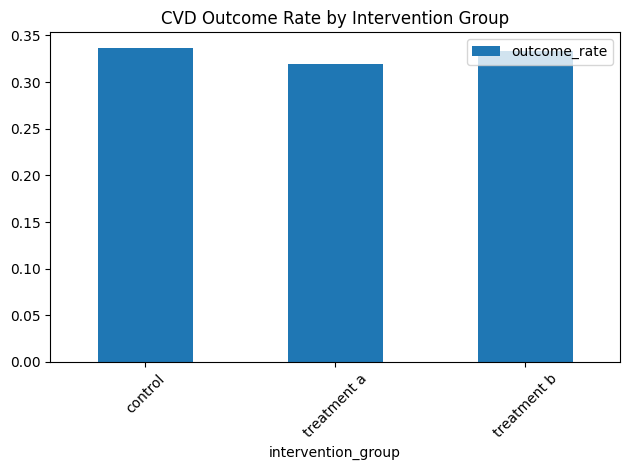

<Figure size 1000x600 with 0 Axes>

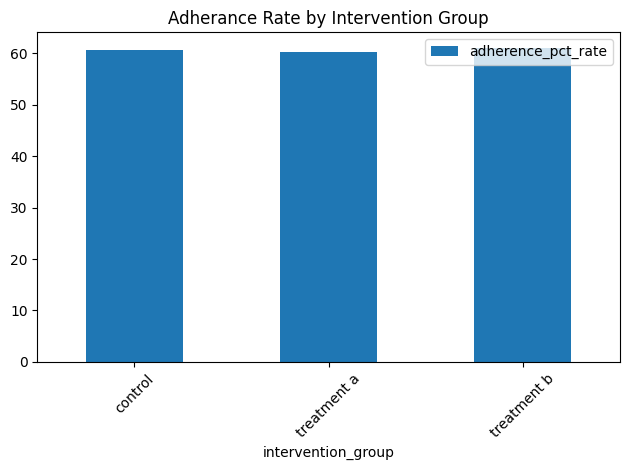

<Figure size 1000x600 with 0 Axes>

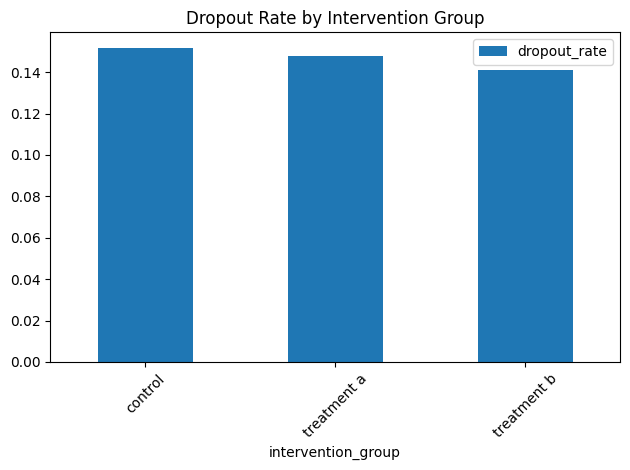

In [7]:
# TODO: Visualization

intervention_outcome = (
    df.groupby('intervention_group', as_index=False)['outcome_cvd']
      .mean()
      .rename(columns={'outcome_cvd': 'outcome_rate'})
)

plot_group_comparison(
    data=intervention_outcome,
    x_col='intervention_group',
    y_col='outcome_rate',
    title='CVD Outcome Rate by Intervention Group'
)

intervention_outcome = (
    df.groupby('intervention_group', as_index=False)['adherence_pct']
      .mean()
      .rename(columns={'adherence_pct': 'adherence_pct_rate'})
)

plot_group_comparison(
    data=intervention_outcome,
    x_col='intervention_group',
    y_col='adherence_pct_rate',
    title='Adherance Rate by Intervention Group'
)

intervention_outcome = (
    df.groupby('intervention_group', as_index=False)['dropout_rate']
      .mean()
      .rename(columns={'dropout_rate': 'dropout_rate'})
)

plot_group_comparison(
    data=intervention_outcome,
    x_col='intervention_group',
    y_col='dropout_rate',
    title='Dropout Rate by Intervention Group'
)

## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [8]:
# TODO: Save summary outputs
summarize_site.to_csv('output/q7_site_summary.csv', index=False)
summary_multi.to_csv('output/q7_intervention_comparison.csv', index=False)

with open('output/q7_analysis_report.txt', 'w') as file:
    print("The mean outcome_cvd rate by intervention group is:\n", file=file)
    print(intervention_summary, file=file)
    print("\nThe mean adherence_pct by intervention group is:\n", file=file)    
    print(intervention_summary_pct, file=file)
    print("\nThe dropout counts by intervention group are:\n", file=file)
    print(pd.crosstab(df['intervention_group'], df['dropout']), file=file)


## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. In Treatment A, the CVD outcome rate is slightly lower, which means Treatment A might be more effective than the other treaments for reducing cardiovascular disease outcome.
2. Another finding is that adherance did not change too much between intervention types, which is a good sign
3. The control group had the highest CVD outcome rate with also the highest amount of dropout rate, which could be explained by its inefficinecy, so people dropped out of the study.
